In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import lmfit
import math
from lmfit.lineshapes import gaussian2d, lorentzian

In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
data = pd.read_csv("quadrant 1.csv", sep=",")
data = data.sort_values(by=["Z X-Ray Coordinate", 
                            "X X-Ray Coordinate",
                            "Y X-Ray Coordinate", 
                            "Y Pixel Index",
                            "X Pixel Index"])
data

,X X-Ray Coordinate,Y X-Ray Coordinate,Z X-Ray Coordinate,X Pixel Index,Y Pixel Index,Charge Fraction
0,0,0,0,0,0,0.000000
6655,0,0,0,1,0,0.000000
13310,0,0,0,2,0,0.000000
19965,0,0,0,3,0,0.000000
26620,0,0,0,4,0,0.000000
...,...,...,...,...,...,...
6654,10,10,10,0,4,0.000125
13309,10,10,10,1,4,0.001829
19964,10,10,10,2,4,0.011189
26619,10,10,10,3,4,0.011189


# Get Sample

In [4]:
# CHARGE VALUES TO GET YOUR SAMPLE
x_xray = 8
y_xray = 4
z_xray = 8

In [5]:
sample = data.loc[(data["X X-Ray Coordinate"] == x_xray) & (data["Y X-Ray Coordinate"] == y_xray) & (data["Z X-Ray Coordinate"] == z_xray)]
sample

,X X-Ray Coordinate,Y X-Ray Coordinate,Z X-Ray Coordinate,X Pixel Index,Y Pixel Index,Charge Fraction
1020,8,4,8,0,0,0.000038
7675,8,4,8,1,0,0.000335
14330,8,4,8,2,0,0.001141
20985,8,4,8,3,0,0.000988
27640,8,4,8,4,0,0.000230
2351,8,4,8,0,1,0.000258
9006,8,4,8,1,1,0.004466
15661,8,4,8,2,1,0.031773
22316,8,4,8,3,1,0.024810
28971,8,4,8,4,1,0.002617


# Fit Model

In [6]:
x = sample["X Pixel Index"].to_numpy()
y = sample["Y Pixel Index"].to_numpy()
z = sample["Charge Fraction"].to_numpy()

In [7]:
model = lmfit.models.Gaussian2dModel()
params = model.guess(z, x, y)
result = model.fit(z, x=x, y=y, params=params)

In [8]:
# get detailes about the model
result

# alternatively you can also use
# lmfit.report_fit(result)

# Get Original and Predicted Coordinates for X-Ray

In [9]:
original_center_x = 2.5 + x_xray / 20
original_center_y = 2.5 + y_xray / 20
original_center_x, original_center_y

(2.9, 2.7)

In [10]:
predicted_center_x = result.params.get("centerx").value + 0.5
predicted_center_y = result.params.get("centery").value + 0.5
predicted_center_x, predicted_center_y

(2.8723871296640002, 2.6727892875190356)

# Plot

In [11]:
def plot_graph(z, graph_title, z_name, scale_min, scale_max):
    fig, ax = plt.subplots()
    art = ax.pcolor(np.reshape(z,(5,5)), vmin=scale_min, vmax=scale_max, shading='auto')
    plt.colorbar(art, ax=ax, label=z_name)
    
    ax.set_title(graph_title)
    ax.set_xlabel('Grid X axis')
    ax.set_ylabel('Grid Y axis')
    
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.axis('equal')
    
    plt.show()

In [12]:
original_values = np.reshape(z, (5,5))
predicted_values = np.reshape(model.func(x, y, **result.best_values), (5,5))
differences = original_values - predicted_values
errors = abs(differences) / original_values

In [13]:
max_value = max(np.amax(original_values), np.amax(predicted_values))
min_difference, max_difference = np.amax(differences), np.amax(differences)

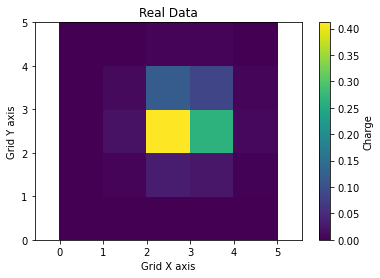

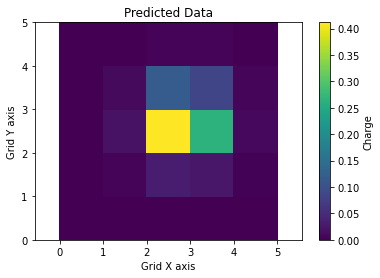

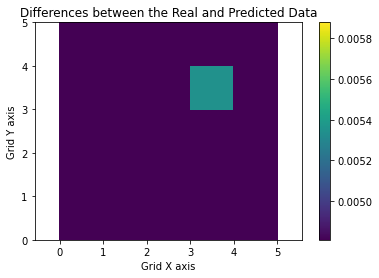

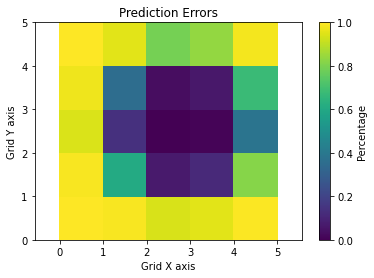

In [14]:
# plot the original data
plot_graph(original_values, "Real Data", "Charge", 0, max_value)
# plot the predicted data
plot_graph(original_values, "Predicted Data", "Charge", 0, max_value)
# plot the differences between the original and predicted data
plot_graph(differences, "Differences between the Real and Predicted Data", "", min_difference, max_difference)
# plot the prediction errors
plot_graph(errors, "Prediction Errors", "Percentage", 0, 1)

# Compare Original and Predicted Values for Each Pixel

In [16]:
predicted_value = model.func(x, y, **result.best_values)

In [17]:
comparison = pd.DataFrame()
comparison["X Pixel Index"] = [0] * 5 + [1] * 5 + [2] * 5 + [3] * 5 + [4] * 5
comparison["Y Pixel Index"] = list(range(0,5)) * 5
comparison["Original Value"] = z
comparison["Predicted Value"] = predicted_value
comparison["Difference"] = z - predicted_value
comparison["Error"] = abs(comparison["Difference"]) / comparison["Original Value"]
comparison

,X Pixel Index,Y Pixel Index,Original Value,Predicted Value,Difference,Error
0,0,0,0.000038,6.160394e-09,0.000038,0.999836
1,0,1,0.000335,3.564628e-06,0.000332,0.989367
2,0,2,0.001141,6.903685e-05,0.001071,0.939469
3,0,3,0.000988,4.475161e-05,0.000943,0.954694
4,0,4,0.000230,9.709514e-07,0.000229,0.995781
5,1,0,0.000258,3.027165e-06,0.000255,0.988283
6,1,1,0.004466,1.751628e-03,0.002714,0.607764
7,1,2,0.031773,3.392412e-02,-0.002152,0.067720
8,1,3,0.024810,2.199056e-02,0.002820,0.113652
9,1,4,0.002617,4.771172e-04,0.002140,0.817688
